## Plotting Sea Ice in MOM01v5 KDS75

This script plots sea ice concentration with CC functionality.


In [1]:
# Load modules
%matplotlib inline

import cosima_cookbook as cc
from mpl_toolkits.basemap import Basemap # plot on map projections

netcdf_index loaded.


In [2]:
cc.start_cluster()

If the link to the dashboard below doesn't work, run this command on a local terminal to set up a SSH tunnel:

  ssh -N -L 39930:127.0.0.1:39930 vdi-n25.nci.org.au -l amh157


Client Scheduler: tcp://127.0.0.1:34315 Dashboard: http://127.0.0.1:39930,Cluster Workers: 4 Cores: 8 Memory: 24.00 GB


In [3]:
configuration = 'mom01v5'
expts = cc.get_experiments(configuration)
display(expts)


['GFDL50',
 'KDS75',
 'KDS75_PI',
 'KDS75_UP',
 'KDS75_WOA13',
 'KDS75_newbathy_CORE',
 'KDS75_newbathy_JRA',
 'KDS75_newbathy_JRA_runoff',
 'KDS75_salt10days',
 'KDS75_saltfluxes',
 'KDS75_wind',
 'kds75_cp',
 'kds75_wp2']

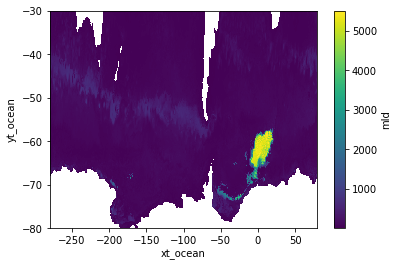

In [4]:
expt='kds75_wp2'
mld= cc.get_nc_variable(expt,
                    'ocean_month.nc',
                    'mld',
                    time_units='days since 1860-01-01',
                    use_bag=True,
                    )
mean_mld = mld.sel(yt_ocean=slice(-80,-30)).sel(time='1975-09').mean('time')
mean_mld.plot.pcolormesh()

HBox(children=(IntProgress(value=0, description='get_nc_variable:: ', max=38), HTML(value='')))

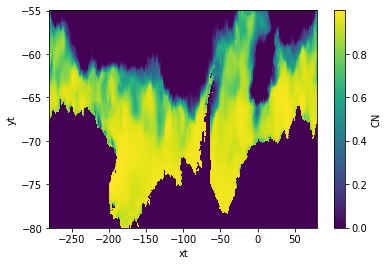

In [5]:
pert_i=cc.get_nc_variable('kds75_wp2',
                    'ice_month.nc',
                    'CN',
                    time_units='days since 1860-01-01',
                    n=38
                    )
septice = pert_i.sel(yt=slice(-80,-55)).sel(time='1975-09').sum('ct').mean('time')
septice.plot.pcolormesh()

### Cautionary Notes
The above code works fast and smoothly, but there is a limit in the data that can be loaded. The kernel dies (presumably running out of memory) if we set n=40, while it works happily for n<39. In other words, we don't have the capacity to read in the entire dataset...